In [2]:
import requests
from addict import Dict
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np

In [3]:
Result = namedtuple('Result', ['wall_time','step','value'])
base_url="http://bigboss:9849/data/plugin/scalars/scalars"

In [14]:
metric_names = ("eval_average_accuracy_model_for_curriculum_idx", "train_running_average_accuracy_model_idx_")
# levels = tuple(map(str, range(1, 21)))
levels = tuple(map(str, range(0, 20)))
current_task_metric = "train_running_average_accuracy_model_idx_"
tranfer_metric_name = "eval_average_accuracy_model_for_curriculum_idx"
model_to_name_dict = {}
# model_to_name_dict["128"] = "128"
model_to_name_dict["256"] = "large"
model_to_name_dict["128_gem_net2net_256"] = "small+gem+net2net"
model_to_name_dict["256_gem"] = "large+gem"
model_to_name_dict["128_net2net_256"] = "small+net2net"
model_to_name_dict["128_gem_net2net"] = "small+gem+net2net"
model_to_name_dict["128_net2net"] = "small+net2net"
break_index = {"128": 8,
               "128_gem": 6}

# model_to_label_map = {
#     "128": "Lstm-128",
#     "128_gem": "Lstm-128-Gem",
#     "128_net2net_256": "Lstm-128-Net2Net", 
#     "128_gem_net2net_256": "Lstm-128-Gem-Net2Net", 
#     "256": "Lstm-256", 
#     "256_gem": "Lstm-256-Gem"
# }

model_to_label_map = {
    "128": "small-Lstm",
    "128_gem": "small-Lstm-Gem",
    "128_net2net_256": "small-Lstm-Net2Net", 
    "128_net2net": "small-Lstm-Net2Net", 
    "128_gem_net2net_256": "small-Lstm-Gem-Net2Net", 
    "128_gem_net2net": "small-Lstm-Gem-Net2Net", 
    "256": "large-Lstm", 
    "256_gem": "large-Lstm-Gem"
}

In [15]:
model_names = ("128_net2net_256", "128_gem_net2net_256", "256", "256_gem")
metric = current_task_metric
level = 0
color_map = {
    '128_gem_net2net_256': 'tab:blue',
    '128_gem_net2net': 'tab:blue',
    '128_net2net_256': 'tab:orange',
    '128_net2net': 'tab:orange',
    '256': 'tab:green',
    '256_gem': 'tab:red',
    '128': 'tab:purple', 
    '128_gem': 'tab:brown'
}

In [16]:
def get_result_for_model(task, model, metric, level):
    params = Dict()
    if task:
        params.run = "{}/{}".format(task, model)
    else:
        params.run = "{}".format(model)
    params.tag = "{}{}".format(metric, level)
    r = requests.get(base_url, params)
    if(r.status_code!=200):
        print(r.url)
#         print("Error")
        return None
    result = list(map(lambda x: Result(*x), r.json()))
    return result

def get_current_task_accuracy(task, model, level):
    result = get_result_for_model(task, model, metric=current_task_metric, level=level)
    if result:
        return result[-1]
    else:
        None
        
def get_current_performance_for_all_models_all_levels(task):
    current_task_performance = {}
    for m in model_names:
        current_task_performance[m] = {}
        for l in levels:
            res = get_current_task_accuracy(task, m, l)
            if res:
                current_task_performance[m][l] = res
            else:
                break
    return current_task_performance


http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_net2net_256&tag=train_running_average_accuracy_model_idx_14
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_gem_net2net_256&tag=train_running_average_accuracy_model_idx_11
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256&tag=train_running_average_accuracy_model_idx_13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256_gem&tag=train_running_average_accuracy_model_idx_10


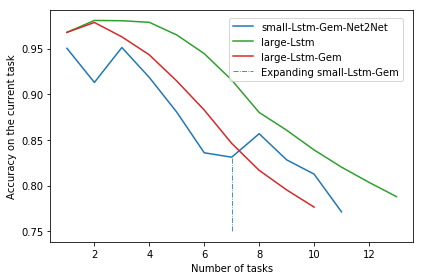

<Figure size 432x288 with 0 Axes>

In [19]:
def generate_current_accuracy_plots(task):
    
    current_task_performance = get_current_performance_for_all_models_all_levels(task)
#     for m in ["128", "128_gem"]:
#         if(not current_task_performance[m]):
#             new_key = m+"_net2net"
#             data_to_search_index_from = list(map(lambda x: x.step, current_task_performance[new_key].values()))
#             print(data_to_search_index_from)
#             index = [_index for _index in enumerate(data_to_search_index_from) if data_to_search_index_from[_index] > 30000  ]
#             print(index)
#             current_task_performance
    model_names = ("128_gem_net2net_256", "256", "256_gem")
    for m in model_names:
        y = list(map(lambda key_value: key_value[1].value, current_task_performance[m].items()))
        x = list(range(1, len(y)+1))
        plt.plot(x, y, label=model_to_label_map[m], color=color_map[m])
        plt.xlabel("Number of tasks")
        plt.ylabel("Accuracy on the current task")
    
    plt.plot([7, 7], [0.75, 0.8311], '-.', color = 'tab:blue', lw=0.8, label="Expanding small-Lstm-Gem")
#     plt.plot([11, 11], [0.75, 0.7993], '-.', color = 'tab:orange', lw=0.8, label="Expanding Lstm-128")
    
    plt.legend(loc='center left', bbox_to_anchor=(0.48, 0.83))
#     plt.legend(loc='center left')
    file_name = "{}_{}".format(task, "current_accuracy")
    plt.tight_layout()
    plt.savefig('copy_current_acc.pdf', format='pdf', dpi=1000)
    plt.show()
    plt.clf()

generate_current_accuracy_plots("cpu/copy")
# generate_current_accuracy_plots("")

In [7]:
# Original Code
# def generate_current_accuracy_plots(task):
    
#     current_task_performance = get_current_performance_for_all_models_all_levels(task)
# #     for m in ["128", "128_gem"]:
# #         if(not current_task_performance[m]):
# #             new_key = m+"_net2net"
# #             data_to_search_index_from = list(map(lambda x: x.step, current_task_performance[new_key].values()))
# #             print(data_to_search_index_from)
# #             index = [_index for _index in enumerate(data_to_search_index_from) if data_to_search_index_from[_index] > 30000  ]
# #             print(index)
# #             current_task_performance
#     model_names = ("128_gem_net2net_256", "256", "256_gem")
#     for m in model_names:
#         y = list(map(lambda key_value: key_value[1].value, current_task_performance[m].items()))
#         x = list(range(1, len(y)+1))
#         plt.plot(x, y, label=model_to_label_map[m], color=color_map[m])
#         plt.xlabel("Number of tasks")
#         plt.ylabel("Accuracy on the current task")
    
#     plt.plot([7, 7], [0.75, 0.8311], '-.', color = 'tab:blue', lw=0.8, label="Expanding Lstm-128-Gem")
#     plt.plot([11, 11], [0.75, 0.7993], '-.', color = 'tab:orange', lw=0.8, label="Expanding Lstm-128")
    
#     plt.legend(loc='center left', bbox_to_anchor=(0.52, 0.8))
# #     plt.legend(loc='center left')
#     file_name = "{}_{}".format(task, "current_accuracy")
#     plt.tight_layout()
#     plt.savefig("copy_current_acc")
#     plt.show()
#     plt.clf()

# generate_current_accuracy_plots("cpu/copy")

In [9]:
# get_current_performance_for_all_models_all_levels(task="cpu/copy")['128_gem_net2net_256']
get_current_performance_for_all_models_all_levels(task="")['128_gem_net2net_256']

http://bigboss:9849/data/plugin/scalars/scalars?run=128_net2net_256&tag=train_running_average_accuracy_model_idx_0
http://bigboss:9849/data/plugin/scalars/scalars?run=128_gem_net2net_256&tag=train_running_average_accuracy_model_idx_0
http://bigboss:9849/data/plugin/scalars/scalars?run=256&tag=train_running_average_accuracy_model_idx_0
http://bigboss:9849/data/plugin/scalars/scalars?run=256_gem&tag=train_running_average_accuracy_model_idx_0


{}

http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx14
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_gem_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx11
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256&tag=eval_average_accuracy_model_for_curriculum_idx13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256_gem&tag=eval_average_accuracy_model_for_curriculum_idx10
[0.5948333144187927, 0.5859479308128357, 0.5688113371531168, 0.5547953248023987, 0.561234450340271, 0.5695293545722961, 0.5705362813813346, 0.5761896818876266, 0.5845756332079569, 0.5976998388767243, 0.5926923264156688, 0.5831430181860924, 0.6205941301125747]
sum_256_gem_cpu_copy_previous_accuracy


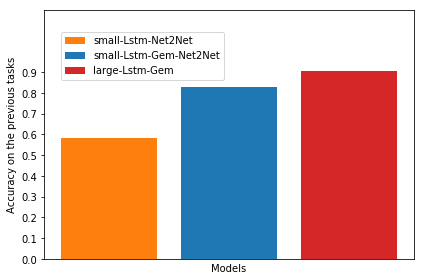

In [20]:
levels = tuple(map(str, range(1, 21)))
def get_previous_task_accuracy(task, model, level):
    result = get_result_for_model(task, model, metric=tranfer_metric_name, level=level)
    if result:
        return result[:level]
    else:
        None

def get_previous_performance_for_all_models_all_levels(task):
    previous_task_performance = {}
    for m in model_names:
        previous_task_performance[m] = {}
        for l in levels:
            res = get_previous_task_accuracy(task, m, int(l))
            if res:
                average_res = np.mean(np.asarray(list(map(lambda x: x.value, res))))
                previous_task_performance[m][l] = average_res
            else:
                break
    return previous_task_performance

def generate_previous_accuracy_plots(task):
    previous_task_performance = get_previous_performance_for_all_models_all_levels(task)
    y = []
    x = []
    fig, ax = plt.subplots(1, 1)
    curr_ax = ax
    use_mean = True
    if(use_mean):
        f = np.mean
    else:
        f = np.sum
    
    print(list(map(lambda key_value: key_value[1], previous_task_performance["128_net2net_256"].items())))
    x = ["128", "128_gem"]
    y = [f(np.asarray(list(map(lambda key_value: key_value[1], previous_task_performance["128_net2net_256"].items()))[:8])),
        f(np.asarray(list(map(lambda key_value: key_value[1], previous_task_performance["128_gem_net2net_256"].items()))[:6]))]
    
    model_names = ("128_net2net_256", "128_gem_net2net_256", "256_gem")
    x = []
    y = []
    for m in model_names:
        
        if(previous_task_performance[m]):
            y.append(f(np.asarray(list(map(lambda key_value: key_value[1], previous_task_performance[m].items())))))
            x.append(m)
    
    if(use_mean):
        plt.ylim(0, 1)
    else:
        plt.ylim(0, 15)
        
    for idx, (_x, _y) in enumerate(zip(x, y)):
        curr_ax.bar(idx, _y, label=model_to_label_map[_x], align="center", color = color_map[_x])
    
    plt.legend(loc='lower right', bbox_to_anchor=(0.5, 0.7))
    file_name = "sum_{}_{}_{}".format(m, "_".join(task.split("/")), "previous_accuracy")
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False
    )
    if(use_mean):
        plt.ylim(0.0, 1.2)
    else:
        plt.ylim(0.0, 10)
    
    if(use_mean):
        plt.yticks(np.arange(0.0, 1.0, 0.1))
    else:
        plt.yticks(np.arange(0.0, 10.0, 0.5))
    plt.xlabel("Models")
    plt.ylabel("Accuracy on the previous tasks")
    plt.tight_layout()
    
    print(file_name)
    plt.savefig('prev_copy.pdf', format='pdf', dpi=1000)
#     plt.savefig("prev_copy")
#     plt.clf()
generate_previous_accuracy_plots(task="cpu/copy")


In [42]:
# def get_previous_task_accuracy(task, model, level):
#     result = get_result_for_model(task, model, metric=tranfer_metric_name, level=level)
#     if result:
#         return result[:level]
#     else:
#         None

# def get_previous_performance_for_all_models_all_levels(task):
#     previous_task_performance = {}
#     for m in model_names:
#         previous_task_performance[m] = {}
#         for l in levels:
#             res = get_previous_task_accuracy(task, m, int(l))
#             if res:
#                 average_res = np.mean(np.asarray(list(map(lambda x: x.value, res))))
#                 previous_task_performance[m][l] = average_res
#             else:
#                 break
#     return previous_task_performance

# def generate_previous_accuracy_plots(task):
#     previous_task_performance = get_previous_performance_for_all_models_all_levels(task)
#     y = []
#     x = []
#     fig, ax = plt.subplots(1, 1)
#     curr_ax = ax
#     use_mean = True
#     if(use_mean):
#         f = np.mean
#     else:
#         f = np.sum
    
#     print(list(map(lambda key_value: key_value[1], previous_task_performance["128_net2net_256"].items())))
#     x = ["128", "128_gem"]
#     y = [f(np.asarray(list(map(lambda key_value: key_value[1], previous_task_performance["128_net2net_256"].items()))[:8])),
#         f(np.asarray(list(map(lambda key_value: key_value[1], previous_task_performance["128_gem_net2net_256"].items()))[:6]))]
#     for m in model_names:
        
#         if(previous_task_performance[m]):
#             y.append(f(np.asarray(list(map(lambda key_value: key_value[1], previous_task_performance[m].items())))))
#             x.append(m)
    
#     if(use_mean):
#         plt.ylim(0, 1)
#     else:
#         plt.ylim(0, 15)
        
#     for idx, (_x, _y) in enumerate(zip(x, y)):
#         curr_ax.bar(idx, _y, label=_x, align="center", color = color_map[_x])
    
# #     plt.legend(loc='lower right', bbox_to_anchor=(0.65, 0.55))
#     file_name = "sum_{}_{}_{}".format(m, "_".join(task.split("/")), "previous_accuracy")
#     plt.tick_params(
#         axis='x',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         labelbottom=False
#     )
#     if(use_mean):
#         plt.ylim(0.0, 1.0)
#     else:
#         plt.ylim(0.0, 10)
    
#     if(use_mean):
#         plt.yticks(np.arange(0.0, 1.0, 0.1))
#     else:
#         plt.yticks(np.arange(0.0, 10.0, 0.5))
#     plt.xlabel("Models")
#     plt.ylabel("Accuracy on the previous tasks")
#     plt.tight_layout()
    
#     print(file_name)
#     plt.savefig("prev_copy")
# #     plt.clf()
# generate_previous_accuracy_plots(task="cpu/copy")


http://bigboss:9849/data/plugin/scalars/scalars?run=128_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx0
http://bigboss:9849/data/plugin/scalars/scalars?run=128_gem_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx0
http://bigboss:9849/data/plugin/scalars/scalars?run=256&tag=eval_average_accuracy_model_for_curriculum_idx0
http://bigboss:9849/data/plugin/scalars/scalars?run=256_gem&tag=eval_average_accuracy_model_for_curriculum_idx0
[]
sum_256_gem__previous_accuracy


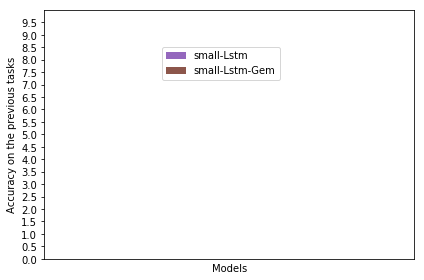

In [22]:
def get_previous_task_accuracy(task, model, level):
    result = get_result_for_model(task, model, metric=tranfer_metric_name, level=level)
    if result:
        return result[:level]
    else:
        None

def get_previous_performance_for_all_models_all_levels(task):
    previous_task_performance = {}
    for m in model_names:
        previous_task_performance[m] = {}
        for l in levels:
            res = get_previous_task_accuracy(task, m, int(l))
            if res:
                average_res = np.mean(np.asarray(list(map(lambda x: x.value, res))))
                previous_task_performance[m][l] = average_res
            else:
                break
    return previous_task_performance

def generate_previous_accuracy_plots(task):
    previous_task_performance = get_previous_performance_for_all_models_all_levels(task)
    y = []
    x = []
    fig, ax = plt.subplots(1, 1)
    curr_ax = ax
    use_mean = False
    if(use_mean):
        f = np.mean
    else:
        f = np.sum
    
    print(list(map(lambda key_value: key_value[1], previous_task_performance["128_net2net_256"].items())))
    x = ["128", "128_gem"]
    y = [f(np.asarray(list(map(lambda key_value: key_value[1], previous_task_performance["128_net2net_256"].items()))[:8])),
        f(np.asarray(list(map(lambda key_value: key_value[1], previous_task_performance["128_gem_net2net_256"].items()))[:6]))]
    for m in model_names:
        
        if(previous_task_performance[m]):
            y.append(f(np.asarray(list(map(lambda key_value: key_value[1], previous_task_performance[m].items())))))
            x.append(m)
    
    if(use_mean):
        plt.ylim(0, 1)
    else:
        plt.ylim(0, 15)
        
    for idx, (_x, _y) in enumerate(zip(x, y)):
        curr_ax.bar(idx, _y, label=model_to_label_map[_x], align="center", color = color_map[_x])
    
    plt.legend(loc='lower right', bbox_to_anchor=(0.65, 0.7))
    file_name = "sum_{}_{}_{}".format(m, "_".join(task.split("/")), "previous_accuracy")
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False
    )
    if(use_mean):
        plt.ylim(0.0, 1)
    else:
        plt.ylim(0.0, 10)
    
    if(use_mean):
        plt.yticks(np.arange(0.0, 1.0, 0.1))
    else:
        plt.yticks(np.arange(0.0, 10.0, 0.5))
    plt.xlabel("Models")
    plt.ylabel("Accuracy on the previous tasks")
    plt.tight_layout()
    
    print(file_name)
    
    plt.savefig("prev_copy")
#     plt.clf()
generate_previous_accuracy_plots(task="")
# generate_previous_accuracy_plots(task="cpu/copy")


In [27]:
previous_task_performance = get_previous_performance_for_all_models_all_levels(task="cpu/copy")
previous_task_performance

{'128_net2net_256': {}, '128_gem_net2net_256': {}, '256': {}, '256_gem': {}}

http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx14
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_gem_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx11
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256&tag=eval_average_accuracy_model_for_curriculum_idx13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256_gem&tag=eval_average_accuracy_model_for_curriculum_idx10
sum_256_cpu_copy_previous_accuracy
[0.5888165582111349, 0.6008221996705385, 0.5655718420947207]


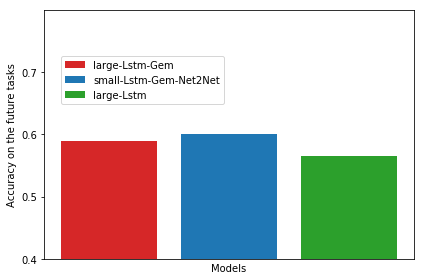

In [24]:
levels = tuple(map(str, range(0, 20)))
def get_future_task_accuracy(task, model, level):
    result = get_result_for_model(task, model, metric=tranfer_metric_name, level=level)
    if result:
        return result[level+1:20]
    else:
        None

def get_future_performance_for_all_models_all_levels(task):
    future_task_performance = {}
    for m in model_names:
        future_task_performance[m] = {}
        for l in levels:
            res = get_future_task_accuracy(task, m, int(l))
            if res:
                average_res = np.mean(np.asarray(list(map(lambda x: x.value, res))))
                future_task_performance[m][l] = average_res
            else:
                break
    return future_task_performance

def generate_future_accuracy_plots(task):
    future_task_performance = get_future_performance_for_all_models_all_levels(task)
    y = []
    x = []
    fig, ax = plt.subplots(1, 1)
    curr_ax = ax
    use_mean = True
    if(use_mean):
        f = np.mean
    else:
        f = np.sum
    x = ["128", "128_gem"]
    y = [f(np.asarray(list(map(lambda key_value: key_value[1], future_task_performance["128_net2net_256"].items()))[:8])),
        f(np.asarray(list(map(lambda key_value: key_value[1], future_task_performance["128_gem_net2net_256"].items()))[:6]))]
    
#     model_names = ("128_net2net_256", "256", "128_gem_net2net_256", "256_gem")
    model_names = ("256_gem", "128_gem_net2net_256", "256")
    x = []
    y = []
    for m in model_names:
        
        if(future_task_performance[m]):
            y.append(f(np.asarray(list(map(lambda key_value: key_value[1], future_task_performance[m].items())))))
            x.append(m)
    if(use_mean):
        plt.ylim(0.5, 0.7)
    else:
        plt.ylim(0, 15)
        
    for idx, (_x, _y) in enumerate(zip(x, y)):
        curr_ax.bar(idx, _y, label=model_to_label_map[_x], align="center", color = color_map[_x])
    
    plt.legend(loc='lower right', bbox_to_anchor=(0.5, 0.6))
    file_name = "sum_{}_{}_{}".format(m, "_".join(task.split("/")), "previous_accuracy")
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False
    )
    plt.ylim(0.4, 0.8)
    
    plt.yticks(np.arange(0.4, 0.8, 0.1))
    plt.xlabel("Models")
    plt.ylabel("Accuracy on the future tasks")
    plt.tight_layout()
    
    print(file_name)
    plt.savefig('next_copy.pdf', format='pdf', dpi=1000)
#     plt.savefig("next_copy")
    print(y)
#     plt.clf()
# generate_future_accuracy_plots(task="")
generate_future_accuracy_plots(task="cpu/copy")